In [1]:
import pandas as pd
import seaborn as sns

In [25]:
data = pd.read_csv('data/dynamic-fair-division2.csv')

In [26]:
data['recipwelf'] = 1 / (1 - data.welfare)
data['bundle_dif'] = data.bundle_size_1 - data.bundle_size_n
data[['datagenerator','iteration']] = data.dataset.str.split('-', expand=True)


In [27]:
data

,dataset,num_agents,alg,timestep,welfare,envy_12,envy_n1,ef,bundle_size_1,bundle_size_n,val_per_item_11,val_per_item_1n,recipwelf,bundle_dif,datagenerator,iteration
0,recipes-6,2,quantile-max,1,1.000000,0.691797,-0.67978,0,1,0,0.691797,0.000000,inf,1,recipes,6
1,recipes-6,2,quantile-max,2,1.000000,1.466450,-1.45027,0,2,0,0.733225,0.000000,inf,2,recipes,6
2,recipes-6,2,quantile-max,3,0.999395,2.234220,-2.21939,0,3,0,0.744740,0.000000,1652.892562,3,recipes,6
3,recipes-6,2,quantile-max,4,0.999295,3.018250,-3.00420,0,4,0,0.754563,0.000000,1418.439716,4,recipes,6
4,recipes-6,2,quantile-max,5,0.999434,3.759730,-3.74503,0,5,0,0.751947,0.000000,1766.784452,5,recipes,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2879995,"BETA_1,10-15",5,welfare-max,85725,1.000000,1335.630000,1534.05000,1,17059,17084,0.980548,0.889856,inf,-25,"BETA_1,10",15
2879996,"BETA_1,10-15",5,welfare-max,89090,1.000000,1432.290000,1579.94000,1,17758,17767,0.980500,0.889575,inf,-9,"BETA_1,10",15
2879997,"BETA_1,10-15",5,welfare-max,92588,1.000000,1453.630000,1648.36000,1,18447,18467,0.980487,0.889434,inf,-20,"BETA_1,10",15
2879998,"BETA_1,10-15",5,welfare-max,96222,1.000000,1598.440000,1635.23000,1,19220,19156,0.980523,0.889433,inf,64,"BETA_1,10",15


In [28]:
for c in ['num_agents', 'datagenerator', 'alg']:
    print(f'{c}: {list(data[c].unique())}')
print(list(data.columns[5:-1]))

num_agents: [2, 5]
datagenerator: ['recipes', 'recipes_exp', 'auto', 'auto_exp', 'BETA_10,1', 'BETA_1,10', 'BETA_6,1', 'UNIF_0,.2_UNIF_0,.8', 'BETA_1,6', 'BETA_1,1', 'BETA_1,3', 'BETA_10,10', 'UNIF_0,.5_UNIF_0,.5', 'UNIF_0,.8+UNIF_0,.2', 'BETA_3,1']
alg: ['quantile-max', 'normal-short', 'normal-long', 'epoch-compare-short', 'epoch-compare-long', 'random-sampling', 'compare-to-all', 'welfare-max']
['envy_12', 'envy_n1', 'ef', 'bundle_size_1', 'bundle_size_n', 'val_per_item_11', 'val_per_item_1n', 'recipwelf', 'bundle_dif', 'datagenerator']


/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


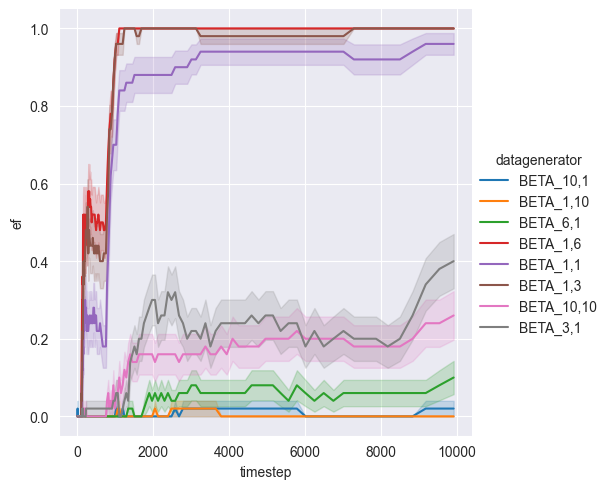

In [30]:
fixed_vals = {
    'num_agents': 5,
    # 'datagenerator': 'BETA_1,1',
    'alg': 'normal-long'
}

data_subset = data[data.timestep < 10000]
data_subset = data_subset[data_subset.datagenerator.str.startswith('BETA')]

for col, val in fixed_vals.items():
    if val is not None:
        data_subset = data_subset[data_subset[col] == val]




g = sns.relplot(data=data_subset,
                kind='line',
                x='timestep',
                # y='envy_12',
                # y='envy_n1',
                y='ef',
                # y='recipwelf',
                # y='bundle_dif',
                # hue='alg',
                hue='datagenerator',
                errorbar='se'
                # estimator =lambda s: s.quantile(q=.5)
                )
# g.set(ylim=(0, 1))